In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [1]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [9]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [15]:
# Set features. This will also be used as your x values.
selected_features = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']

# Create a Train Test Split

Use `koi_disposition` for the y values

In [26]:
X = df[selected_features].values
y = df['koi_disposition'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_train;

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [31]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train.reshape(-1, 1))

In [34]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.601
k: 3, Train/Test Score: 0.791/0.624
k: 5, Train/Test Score: 0.746/0.625
k: 7, Train/Test Score: 0.727/0.637
k: 9, Train/Test Score: 0.717/0.636
k: 11, Train/Test Score: 0.712/0.639
k: 13, Train/Test Score: 0.706/0.644
k: 15, Train/Test Score: 0.698/0.641
k: 17, Train/Test Score: 0.691/0.634
k: 19, Train/Test Score: 0.687/0.634
k: 21, Train/Test Score: 0.686/0.632
k: 23, Train/Test Score: 0.682/0.639
k: 25, Train/Test Score: 0.682/0.636
k: 27, Train/Test Score: 0.678/0.640
k: 29, Train/Test Score: 0.675/0.636


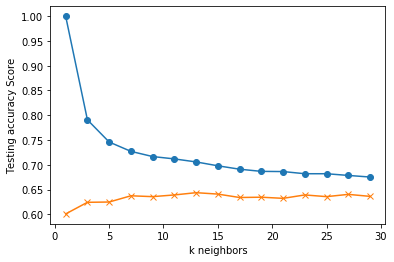

In [40]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [42]:
model2 = KNeighborsClassifier(n_neighbors=20)
model2.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [43]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.6833873736410452
Testing Data Score: 0.6321510297482837


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [44]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 25, 30, 40, 45, 50],
              'p': [1,2]
             
            }
grid = GridSearchCV(model2, param_grid, verbose=3)

In [45]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

/Users/danvaldes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] algorithm=auto, leaf_size=20, p=1 ...............................
[CV] ... algorithm=auto, leaf_size=20, p=1, score=0.666, total=   0.2s
[CV] algorithm=auto, leaf_size=20, p=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ... algorithm=auto, leaf_size=20, p=1, score=0.661, total=   0.2s
[CV] algorithm=auto, leaf_size=20, p=1 ...............................
[CV] ... algorithm=auto, leaf_size=20, p=1, score=0.663, total=   0.2s
[CV] algorithm=auto, leaf_size=20, p=2 ...............................
[CV] ... algorithm=auto, leaf_size=20, p=2, score=0.646, total=   0.2s
[CV] algorithm=auto, leaf_size=20, p=2 ...............................
[CV] ... algorithm=auto, leaf_size=20, p=2, score=0.642, total=   0.2s
[CV] algorithm=auto, leaf_size=20, p=2 ...............................
[CV] ... algorithm=auto, leaf_size=20, p=2, score=0.629, total=   0.2s
[CV] algorithm=auto, leaf_size=25, p=1 ...............................
[CV] ... algorithm=auto, leaf_size=25, p=1, score=0.666, total=   0.3s
[CV] algorithm=auto, leaf_size=25, p=1 ...............................
[CV] ... algorithm=auto, leaf_size=25, p=1, score=0.661, total=   0.2s
[CV] algorithm=auto, leaf_size=25, p=1 ...............................
[CV] .

[CV]  algorithm=ball_tree, leaf_size=40, p=2, score=0.629, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=1, score=0.666, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=1, score=0.661, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=1 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=1, score=0.663, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=2, score=0.646, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=2, score=0.642, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=45, p=2 ..........................
[CV]  algorithm=ball_tree, leaf_size=45, p=2, score=0.629, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=50, p=1 ...................

[CV] .. algorithm=brute, leaf_size=25, p=2, score=0.646, total=   0.2s
[CV] algorithm=brute, leaf_size=25, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=25, p=2, score=0.642, total=   0.2s
[CV] algorithm=brute, leaf_size=25, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=25, p=2, score=0.629, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.666, total=   0.4s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.661, total=   0.4s
[CV] algorithm=brute, leaf_size=30, p=1 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=1, score=0.663, total=   0.4s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................
[CV] .. algorithm=brute, leaf_size=30, p=2, score=0.646, total=   0.2s
[CV] algorithm=brute, leaf_size=30, p=2 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   34.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=20, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 40, 45, 50], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [47]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 20, 'p': 1}
0.6631699408735456


# Save the Model

In [48]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'daniel.sav'
joblib.dump(model2, filename)

['daniel.sav']